In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
#Given values for wavelengths (w) and corresponding pixels (p)
w=np.array([638.10,579.00,577.00,546.1,491.61,435.80,407.78,404.70])
p=np.array([825,1075,1083,1208,1427,1644,1750,1762])

In [4]:
def polyfit_residuals(wav, pix, n):
    """This function takes an array of wavelengths, pixels, and an order number and
    uses the np.polyfit function to perform a polynomial fit. It returns the squared residuals 
    of the fit in an array"""
    
    pixfit_c=np.polyfit(wav, pix, n) #
    pixfit=[]
    powers=np.arange(n+1);powers=powers[n+1:0:-1]
    for w in wav:
        terms=[]
        for i in range(0,n):
            t=pixfit_c[i]*(w**powers[i])
            terms.append(t)
        terms.append(pixfit_c[n])

        pixfit.append(np.sum(terms))

    res=(pixfit-pix)**2
    return(res)

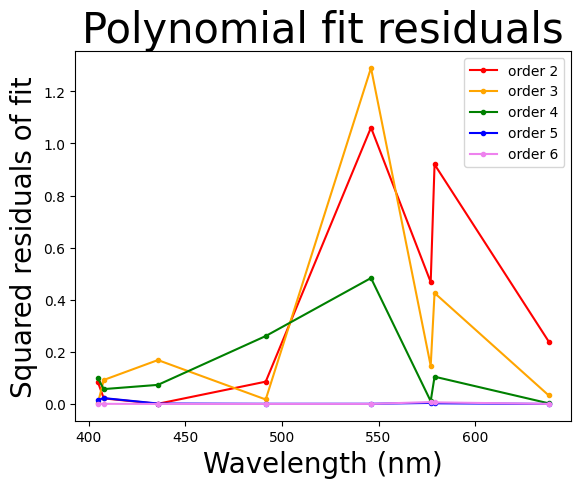

In [5]:
#Plotting squared residuals for a range of different order fits
plt.plot(w,polyfit_residuals(w,p,2),marker='.',c='red',label='order 2')
plt.plot(w,polyfit_residuals(w,p,3),marker='.',c='orange',label='order 3')
plt.plot(w,polyfit_residuals(w,p,4),marker='.',c='green',label='order 4')
plt.plot(w,polyfit_residuals(w,p,5),marker='.',c='blue',label='order 5')
plt.plot(w,polyfit_residuals(w,p,6),marker='.',c='violet',label='order 6')
plt.legend()
plt.ylabel('Squared residuals of fit',fontsize=20)
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.title('Polynomial fit residuals',fontsize=30)
plt.show()

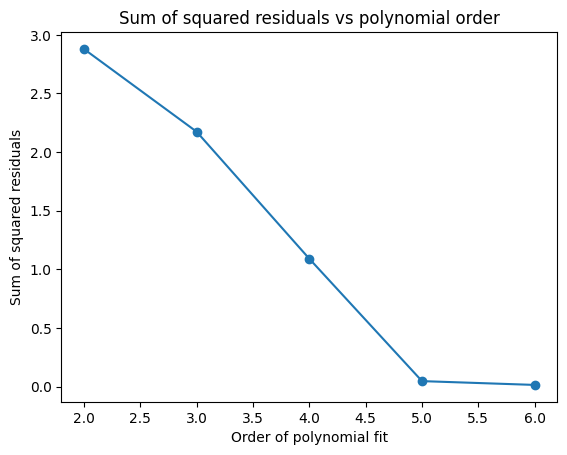

In [6]:
#Plotting sum of squared residuals as a function of fit order
sum_res=[np.sum(polyfit(w,p,2)),np.sum(polyfit(w,p,3)),
         np.sum(polyfit(w,p,4)),np.sum(polyfit(w,p,5)),np.sum(polyfit(w,p,6))]
deg=[2,3,4,5,6]
plt.plot(deg,sum_res,marker='o')
plt.title('Sum of squared residuals vs polynomial order')
plt.xlabel('Order of polynomial fit')
plt.ylabel('Sum of squared residuals')
plt.show()